# K-means and Clustering (unsupervised learning)

When performing unsupervised learning, it's harder (though not impossible) to evaluate the performance of our models.

Let's start with a k-means model and some "fake" data:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

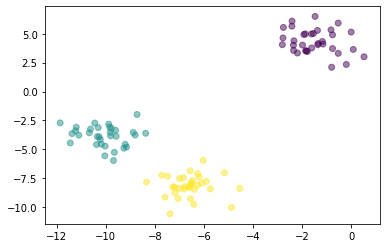

In [2]:
X, target = make_blobs(random_state=1)
plt.scatter(X[:,0], X[:,1], alpha=0.5, c=target)

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
model.cluster_centers_

array([[-10.04935243,  -3.85954095],
       [ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339]])

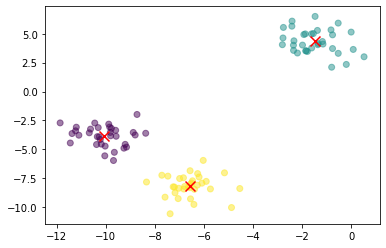

In [8]:
ax = plt.axes()
ax.scatter(X[:,0], X[:,1], alpha=0.5, c=model.labels_)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='r', marker='x', s=100)

K-means is sensitive to the selection of k:

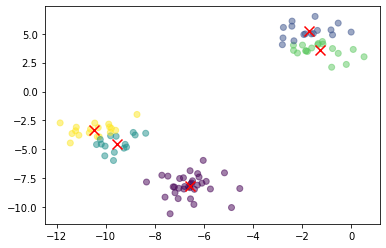

In [9]:
model = KMeans(n_clusters=5)
model.fit(X)

ax = plt.axes()
ax.scatter(X[:,0], X[:,1], alpha=0.5, c=model.predict(X))
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='r', marker='x', s=100)

## Scoring a cluster

One metric we can use is the silhouette score, which measures cluster separation:

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
import numpy as np

ks = np.r_[2:10]
scores = []

for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(X)
    scores.append(silhouette_score(X, km.labels_))

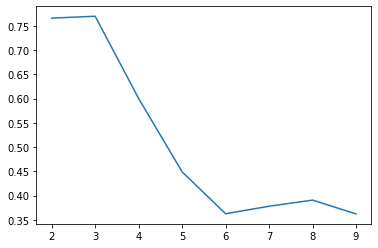

In [12]:
plt.plot(ks, scores);

# Lab

Open [Clustering Lab](sklearn-cluster-lab.ipynb)


